In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [2]:
housing_data = pd.read_csv('/Users/saksham_diwan/Desktop/Housing.csv')
housing_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
housing_data_train = housing_data.get(['price', 'area', 'bedrooms'])

In [4]:
housing_data_train = housing_data_train.assign(price=housing_data_train.get('price')/1000000)
housing_data_train = housing_data_train.assign(area=housing_data_train.get('area')/1000)
housing_data_train 

,price,area,bedrooms
0,13.30000,7.42,4
1,12.25000,8.96,4
2,12.25000,9.96,3
3,12.21500,7.50,4
4,11.41000,7.42,4
...,...,...,...
540,1.82000,3.00,2
541,1.76715,2.40,3
542,1.75000,3.62,2
543,1.75000,2.91,3


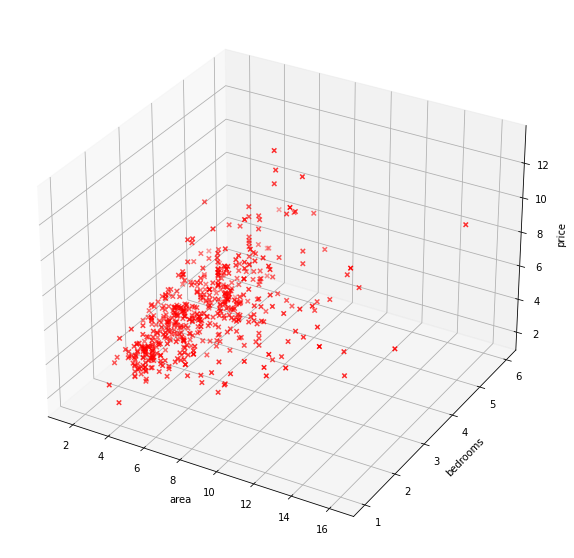

In [6]:
fig, ax = plt.subplots(subplot_kw = {"projection" : "3d"})
ax.scatter(housing_data_train.get('area'), housing_data_train.get('bedrooms'), housing_data_train.get('price'), marker = 'x', c = 'r');
ax.set(xlabel = 'area', ylabel = 'bedrooms', zlabel = 'price');
plt.rcParams['figure.figsize'] = (20, 10)

In [7]:
x_train = np.c_[np.array(housing_data_train.get('area')), np.array(housing_data_train.get('bedrooms'))]
x_train

array([[7.42, 4.  ],
       [8.96, 4.  ],
       [9.96, 3.  ],
       ...,
       [3.62, 2.  ],
       [2.91, 3.  ],
       [3.85, 3.  ]])

In [8]:
y_train = np.array(housing_data_train.get('price'))
y_train

array([13.3    , 12.25   , 12.25   , 12.215  , 11.41   , 10.85   ,
       10.15   , 10.15   ,  9.87   ,  9.8    ,  9.8    ,  9.681  ,
        9.31   ,  9.24   ,  9.24   ,  9.1    ,  9.1    ,  8.96   ,
        8.89   ,  8.855  ,  8.75   ,  8.68   ,  8.645  ,  8.645  ,
        8.575  ,  8.54   ,  8.463  ,  8.4    ,  8.4    ,  8.4    ,
        8.4    ,  8.4    ,  8.295  ,  8.19   ,  8.12   ,  8.08094,
        8.043  ,  7.98   ,  7.9625 ,  7.91   ,  7.875  ,  7.84   ,
        7.7    ,  7.7    ,  7.56   ,  7.56   ,  7.525  ,  7.49   ,
        7.455  ,  7.42   ,  7.42   ,  7.42   ,  7.35   ,  7.35   ,
        7.35   ,  7.35   ,  7.343  ,  7.245  ,  7.21   ,  7.21   ,
        7.14   ,  7.07   ,  7.07   ,  7.035  ,  7.     ,  6.93   ,
        6.93   ,  6.895  ,  6.86   ,  6.79   ,  6.79   ,  6.755  ,
        6.72   ,  6.685  ,  6.65   ,  6.65   ,  6.65   ,  6.65   ,
        6.65   ,  6.65   ,  6.629  ,  6.615  ,  6.615  ,  6.58   ,
        6.51   ,  6.51   ,  6.51   ,  6.475  ,  6.475  ,  6.44

In [9]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
x_norm = scaler.fit_transform(x_train)

In [11]:
sgdr = SGDRegressor(max_iter = 10000)
sgdr.fit(x_norm, y_train)

SGDRegressor(max_iter=10000)

In [12]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
pred = np.dot(x_norm, w_norm) + b_norm

In [14]:
housing_data_train = housing_data_train.assign(predictions = pred)
housing_data_train

,price,area,bedrooms,predictions
0,13.30000,7.42,4,6.451244
1,12.25000,8.96,4,7.100886
2,12.25000,9.96,3,6.803255
3,12.21500,7.50,4,6.484991
4,11.41000,7.42,4,6.451244
...,...,...,...,...
540,1.82000,3.00,2,3.147734
541,1.76715,2.40,3,3.614103
542,1.75000,3.62,2,3.409278
543,1.75000,2.91,3,3.829244
